# Integrating Lorenz equation with Runge-Kutta 4th order

In [1]:
function rungekutta4(f, y₀, Δt, t₀, t₁) 
   
    # fix up Δt so it evenly divides time interval
    N = convert(Int64, round((t₁ - t₀)/Δt))
    Δt = (t₁ - t₀)/N
    Δt2 = Δt/2
    Δt6 = Δt/6
    t = linspace(t₀, t₁, N+1)

    y = zeros(N+1, length(y₀))
    y[1,:] = y₀

    for n = 1:N
        yn = y[n,:]
        tn = t[n]
        s1 = f(tn, yn)
        s2 = f(tn + Δt2, yn + Δt2*s1)
        s3 = f(tn + Δt2, yn + Δt2*s2)
        s4 = f(tn + Δt,  yn + Δt *s3)

        y[n+1, :] =  yn + Δt6*(s1+2s2 + 2s3 + s4) # RK4 update formula
    end
    t,y
end


rungekutta4 (generic function with 1 method)

In [2]:
# define Lorenz equations ẋ = f(t,x)
function lorenz(t,x)
    x = copy(x)
    σ = 10
    β = 8/3
    ρ = 28
    [σ*(x[2]-x[1]); (x[1]*(ρ-x[3]))-x[2]; x[1]*x[2]-(β*x[3])]
end


lorenz (generic function with 1 method)

In [3]:
function df(t,x)
    σ = 10
    β = 8/3
    ρ = 28
    [-σ σ 0; (ρ-x[3]) -1 -x[1] ; x[2] x[1] -β]
end

# integrate ẋ = f(t,x) numerically from t=0 to t=21

Δt = 0.01
t₀ = 0
t₁ = 1.5586522107162
tspan = 0:0.01:1.5586
xo = [-13.763610682134; -19.578751942452; 27]
t,x = rungekutta4(lorenz, xo, Δt, t₀, t₁);

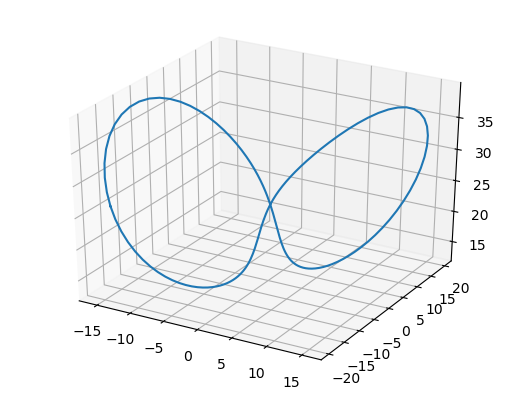

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13b0b5bd0>

In [4]:
using PyPlot

plot3D(x[:,1], x[:,2], x[:,3])

In [5]:
function g(xo)
    # the function g will take as an input xo and output x[1:3]-xo[1:3] and x[3]-27
    # for a periodic orbit T or x[4], all values of g will be zero
    
    # here x of the lorenz function is calculated
    xo = copy(xo)
    Δt = 0.01
    t₀ = 0
    t₁ = copy(xo[4])
    t,x = rungekutta4(lorenz, xo[1:3], Δt, t₀, t₁)
    
    # the function of g=x[1:3] - xo[1:3] and xo[3]-27 (g function has four components) will be constructed here
    result = zeros(xo)
    result[1:3] = x[end,1:3] - xo[1:3]
    result[4] = xo[3] - 27
    result
end


g (generic function with 1 method)

In [6]:
xo = [-13.7636; -19.5787; 27; 1.5586]
g(xo)

4-element Array{Float64,1}:
  0.00296114
 -7.73472e-5
 -0.00970136
  0.0       

In [17]:
function Newton(f, xo, n)
    x = copy(xo)
    xo = copy(xo)
    fxo = f(xo)
    m = length(fxo)
    ϵ = 0.1
    df = zeros(m,m)
    n = copy(n)
    cnt = 0
    
    for Niterations = 1:n
        for j = 1:m
            x_ϵ = copy(xo)
            
            x_ϵ[j] += ϵ
        
            fx_ϵ = f(x_ϵ)
        
            for i = 1:m
                df[i,j] = (fx_ϵ[i] - fxo[i])/ϵ
            end
        end
        
        Δx = -df\fxo
        
        xo += Δx
        
        cnt = cnt + 1
        
        fxo = f(xo)
        
        if mod(n,5)==0
            println(cnt, xo, Δx, fxo)
        end
    
    end
    xo, fxo, cnt
end

Newton (generic function with 1 method)

In [18]:
xo = [-13.7636; -19.5787; 27; 1.3]
Newton(g,xo,40)

1[-10.8092, -17.2489, 27.0, 1.34343][2.9544, 2.3298, 3.84023e-16, 0.0434257][10.9279, 17.489, -15.6893, 0.0]
2[-9.07466, -16.1191, 27.0, 0.679731][1.73454, 1.12978, 0.0, -0.663695][-1.83752, 0.395967, -3.60351, 0.0]
3[-12.1656, -15.6952, 27.0, 0.703639][-3.09093, 0.423891, -0.0, 0.0239081][-0.336894, -1.23772, -0.252236, 0.0]
4[-12.3247, -16.0044, 27.0, 0.721338][-0.159109, -0.309139, -0.0, 0.0176994][-0.649318, -1.36807, 0.592364, 0.0]
5[-12.5423, -16.4287, 27.0, 0.741084][-0.217617, -0.424324, -0.0, 0.0197458][-0.763886, -1.64443, 0.652666, 0.0]
6[-12.7411, -16.7736, 27.0, 0.762052][-0.198761, -0.344898, -0.0, 0.0209675][-0.90165, -1.92886, 0.836386, 0.0]
7[-12.9164, -17.069, 27.0, 0.784489][-0.175347, -0.295436, -0.0, 0.0224375][-1.04973, -2.23465, 1.0287, 0.0]
8[-13.0722, -17.318, 27.0, 0.808501][-0.155766, -0.24893, -0.0, 0.0240123][-1.20828, -2.55968, 1.23979, 0.0]
9[-13.2097, -17.5252, 27.0, 0.834232][-0.137524, -0.207219, -0.0, 0.0257304][-1.37638, -2.90295, 1.4647, 0.0]
10[-13

LoadError: [91mArgumentError: linspace(0.0, -1.6718788122865127, -166): negative length[39m

In [11]:
xo = [-13.7636; -19.5787; 27; 1.2]
Newton(g,xo,50)

1[-9.5873, -16.5551, 27.0, 1.45763][-1.98847, -1.53496, -5.31039, 0.0]
2[-12.5975, -15.85, 27.0, 1.4927][-0.173857, -3.65431, -3.28476, 0.0]
3[-12.7307, -15.8994, 27.0, 1.53063][-1.55624, -4.1118, 1.07876, 0.0]
4[-12.7608, -16.0693, 27.0, 1.57254][-2.09749, -4.46838, 2.17666, 0.0]
5[-12.838, -16.2049, 27.0, 1.61931][-2.39856, -5.07705, 2.39136, 0.0]
6[-12.9398, -16.2909, 27.0, 1.67034][-2.55704, -5.83234, 2.11698, 0.0]
7[-13.0634, -16.3265, 27.0, 1.72398][-2.59343, -6.62093, 1.53984, 0.0]
8[-12.5481, -16.9773, 27.0, 2.04329][9.74663, 12.4598, -8.84626, 0.0]
9[-10.3213, -16.7416, 27.0, 2.31828][25.0029, 33.3717, 6.34488, 0.0]
10[2.10518, -13.736, 27.0, 3.04805][-7.34227, 12.4494, 1.56303, 0.0]
11[-4.54584, -6.80457, 27.0, 2.47381][-2.18145, 1.82896, 0.288936, 0.0]
12[-6.68125, -4.84849, 27.0, 2.56291][1.14561, 1.24561, -0.62587, 0.0]
13[-0.751545, 9.87812, 27.0, 3.49247][12.7174, 2.05258, 4.53626, 0.0]
14[5.80707, 2.37613, 27.0, 3.67404][-7.56248, -2.25493, -3.71164, 0.0]
15[0.336937, 4

([3.78265, 0.280596, 27.0, 2.30591], [3.5838e-12, 9.97979e-13, 4.1922e-12, 0.0], 50)